In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,15)
import seaborn as sns
sns.set_theme()
import tensorly as tl
import tensorly.decomposition as td
from sklearn.decomposition import TruncatedSVD

import imageio
from PIL import Image
import urllib.request
from tqdm import tqdm

from cairosvg import svg2png

import os,time
from glob import glob

import coloredlogs, logging


/var/folders/0h/njbgxkm91h75wxz5tx3bf5dr0000gn/T/ipykernel_21901/1777481617.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: 'libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.so.2' (no such file), '/Users/binhu/anaconda3/envs/EE250/bin/../lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache), 'libcairo.so.2' (no such file), '/usr/local/lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 0x0002): tried: 'libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.2.dylib' (no such file), '/Users/binhu/anaconda3/envs/EE250/bin/../lib/libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache), 'libcairo.2.dylib' (no such file), '/usr/local/lib/libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 0x0002): tried: 'libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo-2.dll' (no such file), '/Users/binhu/anaconda3/envs/EE250/bin/../lib/libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache), 'libcairo-2.dll' (no such file), '/usr/local/lib/libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

In [ ]:
# Create a logger object.
logger = logging.getLogger(__name__)
coloredlogs.install(level='ERROR')

In [ ]:
df = pd.read_csv('flags_url.csv')
df.head()

,country,images_file,image_url,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,Flag_of_Afghanistan.svg,https://upload.wikimedia.org/wikipedia/commons...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Albania,Flag_of_Albania.svg,https://upload.wikimedia.org/wikipedia/commons...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,Algeria,Flag_of_Algeria.svg,https://upload.wikimedia.org/wikipedia/commons...,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,Andorra,Flag_of_Andorra.svg,https://upload.wikimedia.org/wikipedia/commons...,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,Angola,Flag_of_Angola.svg,https://upload.wikimedia.org/wikipedia/commons...,AO,AGO,24.0,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


In [ ]:
#download all flags
for i in tqdm(range(len(df)),ncols=70, colour='green'):
    code = df.iloc[i]['alpha-2']
    url = df.iloc[i].image_url
    path = f'flags/{code}.svg'
    if(os.path.isfile(path)): continue
    try:
        urllib.request.urlretrieve(url,path)
    except:
        pass

100%|██████████████████████████████| 273/273 [00:00<00:00, 613.77it/s]


In [ ]:
for f in tqdm(glob('flags/*.svg'), ncols=70,colour='magenta'):
    pngpath = f.split('.')[0]+'.png'
    try:
        svg2png(url=f, write_to=pngpath)
    except:
        pass

100%|███████████████████████████████| 189/189 [00:11<00:00, 16.31it/s]


In [ ]:
def read_flag(countrycode='IN'):
    countrycode = countrycode.upper()
    #url = df[df['alpha-2']==countrycode].image_url
    path = f'flags/{countrycode}.png'
    flag = Image.open(path).convert('RGB').resize((128,64),)
    flag = np.array(flag)
    return flag

In [ ]:
flag = read_flag('GB')
flag.shape

(64, 128, 3)

(-0.5, 127.5, 63.5, -0.5)

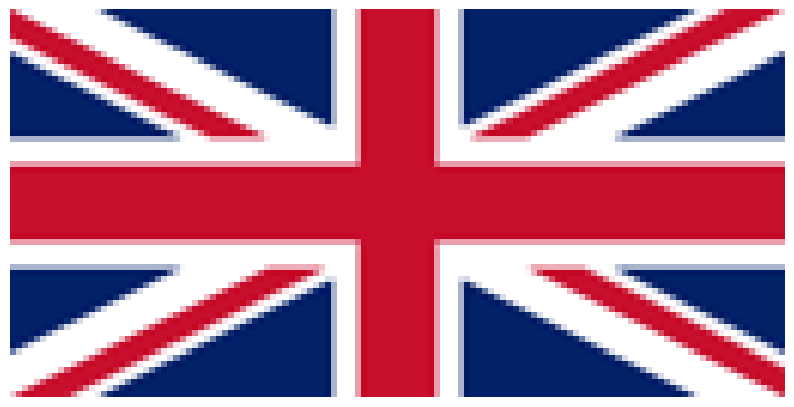

In [ ]:
plt.imshow(flag)
plt.axis('off')

In [ ]:
def decompose(_FLAG,_RANK):
    #(w,f),e = td.non_negative_parafac(np.array(_FLAG,dtype=float),rank=_RANK, n_iter_max=int(1e4), return_errors=True)
    (w,f),e = td.parafac(np.array(_FLAG,dtype=float),orthogonalise=True,rank=_RANK, n_iter_max=int(1e4), return_errors=True)
    
    #print(f'iters:{len(e)}, error: {e[-1]}')
    
    comps=[]
    for r in range(_RANK):
        a = f[0][:,r]
        b = f[1][:,r]
        c = f[2][:,r]
        
        a/=np.linalg.norm(a)
        b/=np.linalg.norm(b)
        c/=np.linalg.norm(c)
        
        comps.append(np.outer(np.outer(a,b),c).reshape(_FLAG.shape))
    return comps,e[-1]

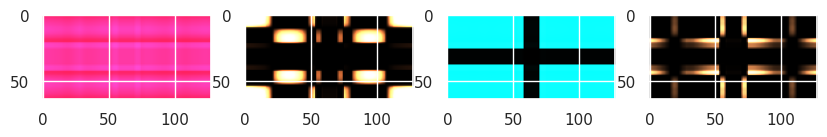

In [ ]:
# Example factorization

R=4
flag_decomp,error = decompose(flag,R)

f, axes = plt.subplots(1, R, figsize=(10,15))
for r,ax in enumerate(axes):
    ax.imshow(flag_decomp[r]*255)

In [ ]:
# https://www.britannica.com/list/flags-that-look-alike

allpngs = ['Venezuela', 'Ecuador', 'Colombia']
allpngs+= ['Slovenia', 'Russia', 'Slovakia']
allpngs+= ['Luxembourg','Netherlands']
allpngs+= ['Norway','Iceland']
allpngs+= ['New Zealand', 'Australia']
allpngs+= ['Indonesia', 'Monaco']
allpngs+= ['Senegal','Mali']


countries = list(map(lambda x:  df[df.country==x]['alpha-2'].to_list()[0] if df[df.country==x]['alpha-2'].to_list() else '', allpngs))
#countries

In [ ]:
features = []
MAX_RANK=7
for c in tqdm(countries, ncols=70, colour='blue'):
    
    __feat_colors=[]
    __feat_factors=[]
    __flag = read_flag(c)
    __flag_normalised = __flag/np.linalg.norm(__flag)
    
    
    for channel in range(3):
        channel_weight = np.linalg.norm(__flag_normalised[:,:,channel])
        __feat_colors.append(channel_weight)
        
    for r in range(1,MAX_RANK):
        factors,e = decompose(__flag,r)
        __feat_factors.append(e)
    
    
    features.append([__feat_colors, __feat_factors])
        

100%|█████████████████████████████████| 16/16 [07:42<00:00, 28.89s/it]


In [ ]:
feat_matrix = np.array(features)
feat_matrix

In [ ]:
svd = TruncatedSVD(n_components=3)
compressed = svd.fit_transform(feat_matrix)
compressed

In [ ]:
sns.scatterplot(x=compressed[:,0], y=compressed[:,1])
for i,c in enumerate(countries):
    codes = df['alpha-2'].to_list()
    names = df['country'].to_list()
    
    plt.text(compressed[i,0], compressed[i,2], names[codes.index(c)], horizontalalignment='left', size='small', color='black', weight='normal')
    #plt.text(compressed[i,1], compressed[i,2], names[codes.index(c)], horizontalalignment='left', size='small', color='black', weight='normal')
